<a href="https://colab.research.google.com/github/BlackCurrantDS/ATiML-Project/blob/master/Final_Model_train_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [0]:
train_data = pd.read_csv("features_scaled_train.csv", index_col=0)

In [5]:
train_data.head(1)

,FileNo,book_lenght,book_sen,book_word,lenght_book,number_sen,number_word,number_of_stop_words,number_of_foreignwords,count_dial_break,noun,verb,adj,ProperNoun,num,Puch,she,he,she_he_ratio,period,comma,colon,semi_colon,exl,q,positive_x,negative_x,neutral,compund,positive_y,negative_y,anger,disgust,fear,sadness,anticipation,joy,surprise,trust,genre,Author_Name,Book_Name
0,29400.0,0.630936,0.041672,0.594109,0.630936,0.041672,0.594109,1.582709,-0.60319,0.77563,-0.8806,2.215819,-1.187174,0.0,-0.398413,-0.744598,-0.455629,2.350944,-1.060459,-0.642366,-0.00424,-0.71147,0.467028,-1.126372,-0.548475,-0.075467,0.283623,-0.355818,-1.0389,-0.436278,1.244505,1.266108,1.689566,2.146652,1.550633,1.177633,-0.099771,0.25454,-0.984709,Detective and Mystery,Dawson| Coningsby,Murder Point: A Tale of Keewatin


In [0]:
val_data = pd.read_csv("features_scaled_test.csv", index_col=0)

In [7]:
val_data.head(1)

,FileNo,book_lenght,book_sen,book_word,lenght_book,number_sen,number_word,number_of_stop_words,number_of_foreignwords,count_dial_break,noun,verb,adj,ProperNoun,num,Puch,she,he,she_he_ratio,period,comma,colon,semi_colon,exl,q,positive_x,negative_x,neutral,compund,positive_y,negative_y,anger,disgust,fear,sadness,anticipation,joy,surprise,trust,genre,Author_Name,Book_Name
0,43716.0,1.078764,0.433424,1.043676,1.078764,0.433424,1.043676,0.450825,0.538737,1.36363,0.242489,-0.534948,-0.472884,0.0,0.300008,-0.681554,-0.463603,1.063622,-0.72838,-1.184825,1.353114,-0.421684,0.840861,1.158436,0.286906,-0.087576,-0.835659,-0.484569,0.186569,1.664194,0.769197,0.468768,0.018321,0.976803,0.618518,1.555762,0.349361,0.088346,1.741793,Sea and Adventure,Aimard| Gustave,The Adventurers


In [0]:
first_cols = ['FileNo','genre','Author_Name', 'Book_Name']
last_cols = [col for col in train_data.columns if col not in first_cols]

train_data = train_data[first_cols+last_cols]

In [9]:
train_data.head(1)

,FileNo,genre,Author_Name,Book_Name,book_lenght,book_sen,book_word,lenght_book,number_sen,number_word,number_of_stop_words,number_of_foreignwords,count_dial_break,noun,verb,adj,ProperNoun,num,Puch,she,he,she_he_ratio,period,comma,colon,semi_colon,exl,q,positive_x,negative_x,neutral,compund,positive_y,negative_y,anger,disgust,fear,sadness,anticipation,joy,surprise,trust
0,29400.0,Detective and Mystery,Dawson| Coningsby,Murder Point: A Tale of Keewatin,0.630936,0.041672,0.594109,0.630936,0.041672,0.594109,1.582709,-0.60319,0.77563,-0.8806,2.215819,-1.187174,0.0,-0.398413,-0.744598,-0.455629,2.350944,-1.060459,-0.642366,-0.00424,-0.71147,0.467028,-1.126372,-0.548475,-0.075467,0.283623,-0.355818,-1.0389,-0.436278,1.244505,1.266108,1.689566,2.146652,1.550633,1.177633,-0.099771,0.25454,-0.984709


In [10]:
train_data.shape

(88, 42)

In [0]:
first_cols = ['FileNo','genre','Author_Name', 'Book_Name']
last_cols = [col for col in val_data.columns if col not in first_cols]

val_data = val_data[first_cols+last_cols]

In [0]:
X_train,y_train = train_data.values[:,4:], train_data.values[:,1]

In [13]:
print("Shape of training input", X_train.shape)
print("Shape of training output", y_train.shape)

Shape of training input (88, 38)
Shape of training output (88,)


In [0]:
X_val,y_val = val_data.values[:,4:], val_data.values[:,1]

In [15]:
print("Shape of test input", X_val.shape)
print("Shape of test output", y_val.shape)

Shape of test input (12, 38)
Shape of test output (12,)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
pca = PCA(n_components=15)
X_train_pca = pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)


**Logistic regression**

In [0]:
lr = LogisticRegression()
lr.fit(X_train_pca,y_train)
y_pred_lr = lr.predict(X_val_pca)

In [19]:
print("Accuracy on overall test set is:", metrics.accuracy_score(y_val,y_pred_lr))

Accuracy on overall test set is: 0.5833333333333334


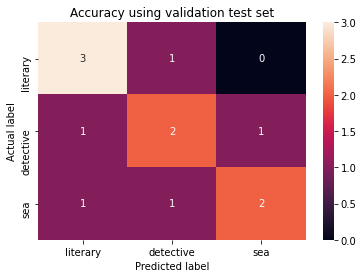

In [20]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_val, y_pred_lr)
cm_df = pd.DataFrame(cm,
                     index = ['literary','detective','sea'], 
                     columns = ['literary','detective','sea'])

sns.heatmap(cm_df, annot=True)
plt.title('Accuracy using validation test set'.format(accuracy_score(y_val, y_pred_lr)))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [21]:
print(classification_report(y_val, y_pred_lr))

                       precision    recall  f1-score   support

Detective and Mystery       0.60      0.75      0.67         4
             Literary       0.50      0.50      0.50         4
    Sea and Adventure       0.67      0.50      0.57         4

             accuracy                           0.58        12
            macro avg       0.59      0.58      0.58        12
         weighted avg       0.59      0.58      0.58        12



**SVM**

In [0]:
from sklearn.svm import SVC
lr = SVC()
lr.fit(X_train_pca,y_train)
y_pred_lr = lr.predict(X_val_pca)

In [23]:
print("Accuracy on overall test set is:", metrics.accuracy_score(y_val,y_pred_lr))

Accuracy on overall test set is: 0.75


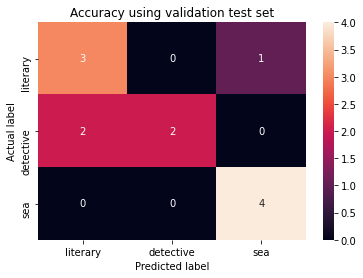

In [24]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_val, y_pred_lr)
cm_df = pd.DataFrame(cm,
                     index = ['literary','detective','sea'], 
                     columns = ['literary','detective','sea'])

sns.heatmap(cm_df, annot=True)
plt.title('Accuracy using validation test set'.format(accuracy_score(y_val, y_pred_lr)))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [25]:
print(classification_report(y_val, y_pred_lr))

                       precision    recall  f1-score   support

Detective and Mystery       0.60      0.75      0.67         4
             Literary       1.00      0.50      0.67         4
    Sea and Adventure       0.80      1.00      0.89         4

             accuracy                           0.75        12
            macro avg       0.80      0.75      0.74        12
         weighted avg       0.80      0.75      0.74        12



**Naive Bayes**

In [0]:
from sklearn.naive_bayes import MultinomialNB
lr = MultinomialNB()
lr.fit(X_train_pca,y_train)
y_pred_lr = lr.predict(X_val_pca)

In [0]:
print("Accuracy on overall test set is:", metrics.accuracy_score(y_val,y_pred_lr))

In [0]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_val, y_pred_lr)
cm_df = pd.DataFrame(cm,
                     index = ['literary','detective','sea'], 
                     columns = ['literary','detective','sea'])

sns.heatmap(cm_df, annot=True)
plt.title('Accuracy using validation test set'.format(accuracy_score(y_val, y_pred_lr)))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [0]:
print(classification_report(y_val, y_pred_lr))